In [1]:
#Load Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import category_encoders as ce
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import  scatter_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from multiprocessing import Pool
import sys
import time


In [2]:
def drop_constant_columns(dataframe):
    
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
            
    return result

In [3]:
def drop_constant_column1(dataframe):
    try:
        eps = 1e-6
        C = dataframe.columns
        print('Identifing low-variance columns...', end=' ')
        
        for c in C:
            print(dataframe[c])
            temp = dataframe.loc[:, c]
            variance=dataframe.loc[:, c].var()
            print(variance)

        if variance < eps:
            # print('.. %-30s: too low variance ... column ignored'%(c))
            dropped_columns.add(c)
            dataframe.drop(c)
            print('done!')
            
    except Exception as e:
        print("drop no variance")
        print(str(e))

In [4]:
def main():
    import pandas as pd
    
    dropped_columns = set()
    targetVariable='fraudulent'
    
    df=pd.read_csv('fake_job_postings.csv')
    
    # number of rows and columns;
    rows, columns = df.shape
    print(f'Number of rows: {rows}\nNumber of columns: {columns}')
    
    cv=df.dtypes.loc[df.dtypes=='object'].index
    categorical = list(df.select_dtypes(include=['object']).columns.values)
    print (cv)
    print(categorical)
    
    try:
        # To calculate mean use imputer class
        from sklearn.impute import SimpleImputer
        
        mean_imputer = SimpleImputer(missing_values='NaN', strategy='mean', axis=0)

        # Train the imputor on the df dataset
        mean_imputer = mean_imputer.fit(df)
        imputed_df = mean_imputer.transform(df.values)
        
        # View the data
        imputed_df

    except Exception as e:
        print("FillNAs")
        print (str(e))
        
    try:
        print(df.shape)
        print(df.info())   
        print(df.groupby(targetVariable).size() )
        print(df.describe())
        
    except Exception as e:
        print("Preprocess errors 2")
        print (str(e))
        
    from sklearn.preprocessing import LabelEncoder
    
    le=LabelEncoder()
    
    try:
        for cat in categorical:
            print(cat)
            df[cat] = le.fit_transform(df[cat].astype(str))
            
    except Exception as e:
        print("errorEncoder")
        print (str(e))

    # drop columns with low variance
    try:
        print("variance1")
       
        # column variance of the dataframe
        print(df.var(axis=0))
        print("variance2")
        
        # row variance of the dataframe
        print(df.var(axis=1))
        
        # drop columns with no variance
        df=drop_constant_column(df)
        threshold = 0.2
        df.drop(df.std()[df.std() < threshold].index.values, axis=1)
        
        print("Number of columns after dropping low variance")
        columns = df.shape[1];
        print(df.shape[1])
        
    except Exception as e:
        print("drop low variance")
        print (str(e))
        
    missing_data=df.isnull()
    
    # check infinite value
    print("check infinite value, you should get false then true")
    print("now all false")
    print(np.isnan(df.any())) 
    
    print("now all true")
    print(np.isfinite(df.all())) 
    print("end check infinite values")
    
    print(missing_data.head(5))
    print(missing_data.sum())
    print(df.head(5))
    

    from sklearn.linear_model import LogisticRegression
    import pandas as pd
    from pandas.api.types import CategoricalDtype
    from collections import defaultdict
    from sklearn.model_selection import train_test_split

    # clean the data set from nulls, nan, and infitinity values
    def clean_dataset(df):
        assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
        df.dropna(inplace=True)
        indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
        return df[indices_to_keep].astype(np.float64)
    
    X=df
    y = pd.DataFrame(data=X, columns=[targetVariable])
    
    try:
        clean_dataset(df)
        
    except Exception as e:
        print("error_preprocess_clean_dataset")
        print (str(e))

    try:
        ce_ord = ce.OrdinalEncoder(cols=['fraudulent', 'title', 'location', 'department', 'salary_range',
            'company_profile', 'description', 'requirements', 'benefits',
            'employment_type', 'required_experience', 'required_education',
            'industry', 'function'])
        df = ce_ord.fit_transform(df)
        

        outdata=ce_ord.fit_transform(X,y)
        outdata1=outdata[['description','title', 'location']]
        outdata2 = outdata[['description', 'title']]
        outdata3 = outdata[['description']]
        
        # we use all columns except PolarityClass as features for training
        
        label = df[targetVariable]
        label1 = df[targetVariable]
        features = df.drop(targetVariable, 1)
        
        # the label is PolarityClass
        print(outdata)
        
    except Exception as e:
        print("error_preprocess0")
        print (str(e))
        
    # Correlation Between Attributes
    try:
        print(df.corr())
        corr_matrix= df.corr()
        #To check a correlation with our target

        print(corr_matrix[targetVariable].sort_values(ascending=False))
        plt.figure()
        sns.heatmap(df.corr(), vmin=-1, vmax=1.0, fontsize=8, annot=True)
        plt.savefig('corr_matrix.png')
        plt.show()
        
    except Exception as e:
        print("error_preprocess1")
        print (str(e))

    #Skew of Univariate Distributions
    #The skew result can show us a positive(right) or negative (left) skew. Values closer to zero show less skew
    try:
        print(df.skew())
        #It is better to use some data visualization to get a better idea.
        from matplotlib import pyplot as plt
        df.hist(bins=10, figsize=(20,15))
        plt.savefig('Univariate_Distributions.png')
        plt.show()
        
    except Exception as e:
        print("errorUnivariate")
        print (str(e))

    df.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, fontsize=8, figsize=(10,15))
    
    try:
        plt.savefig('boxplot.png')
        plt.show()
    except Exception as e:
        print("errorUnivariate")
        print (str(e))
        
    # Evaluation for Missing Data
    
    try:
        missing_data= df.isnull()
        missing_data.head(5)
        print(missing_data.sum())
        
        for column in missing_data.columns.values.tolist():
            print(column)
            print(missing_data[column].value_counts())
            print("--------------------------------")
            
        #Finding the porcentage of  missing data
        print(round(((missing_data.sum()/len(missing_data))*100), 4))
        
        #Lets see our outliers in the data set
        q = df.quantile(0.99)
        print(df [df > q])

        #Lets check the types
        print(df.dtypes)
        
    except Exception as e:
        print("error_Missing Data")
        print (str(e))

    #Feature Selection For Machine Learning
    try:
        X=df.drop(targetVariable,axis=1)
        y=df[targetVariable]

        lab_enc = preprocessing.LabelEncoder()
        training_scores_encoded = lab_enc.fit_transform(y)
        print(utils.multiclass.type_of_target(y))
        print(utils.multiclass.type_of_target(training_scores_encoded.astype('int')))
        print(utils.multiclass.type_of_target(training_scores_encoded))
        print(training_scores_encoded)
        
        #1-Univariete Selection
        #apply SelectKBest class to extract top 10 best features
        
        bestfeatures = SelectKBest(score_func=chi2, k='all')
        fit = bestfeatures.fit(X,training_scores_encoded)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(X.columns)
        
        #concat two dataframes for better visualization
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']  #naming the dataframe columns
        print(featureScores.nlargest(10,'Score'))  #print 10 best features
        
    except Exception as e:
        print("error Feature Selection")
        print (str(e))

    #-Feature Importance

    try:
        model = ExtraTreesClassifier()
        model.fit(X,training_scores_encoded)
        print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
        
        #plot graph of feature importances for better visualization
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(10).plot(kind='barh')
        plt.savefig('important_features.png')
        plt.show()
        
    except Exception as e:
        print("error Feature Importance")
        print (str(e))
        
     #Load the test,train data.

    CLASSIFIERS = [ "LinR", "LogR", "KNN", "GNB", "Per", "LinSVC", "SGD", "DT", "RF", "LDA", \
        "Ada_Ensemble", "GradBoost_Ensemble", "ETC", "XGB" ]

    if (sys.platform == "win32"): # Windows
        print("Classifier accuracy being obtained with single thread")
        classifiers([CLASSIFIERS, X, training_scores_encoded, df, targetVariable])

    else:
        print("Classifier accuracy being obtained with multiple threads")
        fourDataSets = [[CLASSIFIERS[0:3] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[4:7] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[8:11] ,X, training_scores_encoded, df, targetVariable],
                        [CLASSIFIERS[12:13] ,X, training_scores_encoded, df, targetVariable]] 

        pool = Pool(processes=4)
        pool.map(classifiers, fourDataSets)

In [5]:
   
def classifiers(info):
    print("Here")
    classifier_names = info[0]
    X = info[1]
    training_scores_encoded = info[2]
    df = info[3]
    targetVariable = info[4]
    for classifier_name in classifier_names:
        print("Working on "+classifier_name+"...")
        if (classifier_name == "LinR"):
            try:
                print(df.columns)
#                 X=df.drop([targetVariable], axis=1).values
#                 y=df[targetVariable].values

                scaler = MinMaxScaler(feature_range=(0, 1))
                rescaledX = scaler.fit_transform(X)
                
                #Linear Regression
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                lin_reg= LinearRegression()
                results_linreg= cross_val_score(lin_reg, X, training_scores_encoded, cv=kfold)
                print('Estimated Accuracy of Linear Regression: ', results_linreg.mean())
                
            except Exception as e:
                print("Linear Regression")
                print (str(e))

        if (classifier_name == "LogR"):
            try:
                # Logistic Regression
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
                results_logreg = cross_val_score(logreg, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate Accuracy Logistic regression: ', results_logreg.mean())
                
            except Exception as e:
                print("error Logistic regression")
                print (str(e))
                
        if classifier_name == "KNN":
            try:
                # K-Nearest Neighbors
                kfold = KFold(n_splits=10, shuffle=True, random_state=42)
                knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1) # n_jobs=-1 to use all available cores
                results_knn = cross_val_score(knn, X, training_scores_encoded, cv=kfold, n_jobs=-1)
                print('Estimated accuracy KNN:', results_knn.mean())
            except Exception as e:
                print("Error KNN")
                print(str(e))

        if (classifier_name == "GNB"):
            try:
                # Gaussian Naive Bayes
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                gaussian = GaussianNB()
                results_gaussian = cross_val_score(gaussian, X, training_scores_encoded, cv=kfold)
                print('Estimate accuracy GNB: ',results_gaussian.mean())
                
            except Exception as e:
                print("error GNB")
                print (str(e))

        if (classifier_name == "Per"):
            try:
                # Perceptron
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                perceptron = Perceptron(max_iter=1000,tol=1e-3)
                results_perceptron = cross_val_score(perceptron, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy Perceptron: ',results_perceptron.mean())
                
            except Exception as e:
                print("error Perceptron")
                print (str(e))

        if (classifier_name == "LinSVC"):
            try:
                # Linear SVC
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                linear_svc = LinearSVC(max_iter=1000)
                results_linearsvc= cross_val_score(linear_svc, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Linear SVC: ',results_linearsvc.mean())
                
            except Exception as e:
                print("error Linear SVC")
                print (str(e))

        if (classifier_name == "SGD"):
            try:
                # Stochastic Gradient Descent
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                sgd = SGDClassifier(max_iter=1000,tol=1e-3)
                results_sgd = cross_val_score(sgd, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Stochastic Gradient Descent: ',results_sgd.mean())
                
            except Exception as e:
                print("error Stochastic Gradient Descent")
                print (str(e))

        if (classifier_name == "DT"):
            try:
                # Decision Tree
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                decision_tree = DecisionTreeClassifier()
                results_decisiontree = cross_val_score(decision_tree, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy Decision Tree: ',results_decisiontree.mean())
                
            except Exception as e:
                print("error Decision Tree")
                print (str(e))

        if (classifier_name == "RF"):
            try:
                # Random Forest
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                random_forest = RandomForestClassifier(n_estimators=100)
                results_randomforest = cross_val_score(decision_tree, X, training_scores_encoded, cv=kfold,scoring='accuracy')
                print('Estimate accuracy Random Forest: ',results_randomforest.mean())
                
            except Exception as e:
                print("error Random Forest")
                print (str(e))

        if (classifier_name == "LDA"):
            try:
                #Linear Discriminant Analysis
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                clf = LinearDiscriminantAnalysis()
                results_clf = cross_val_score(clf, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Linear Discriminant Analysis: ',results_clf.mean())
                
            except Exception as e:
                print("error Linear Discriminant Analysis")
                print (str(e))

        if (classifier_name == "Ada_Ensemble"):
            try:
                # Ada Boost Classifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                AB = AdaBoostClassifier()
                results_AB = cross_val_score(AB, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Ada Boost Classifier: ',results_AB.mean())
                
            except Exception as e:
                print("error  Ada Boost Classifier")
                print (str(e))

        if (classifier_name == "GradBoost_Ensemble"):
            try:
                #AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

                # Gradient Boosting Classifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                GBC = GradientBoostingClassifier()
                results_GBC = cross_val_score(GBC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Gradient Boosting Classifier: ',results_GBC.mean())
                
            except Exception as e:
                print("error Gradient Boosting Classifier")
                print (str(e))

        if (classifier_name == "ETC"):
            try:
                #ExtraTreesClassifier
                kfold = KFold(n_splits=10, random_state=42, shuffle=True)
                ETC=ExtraTreesClassifier(n_estimators=100)
                results_ETC = cross_val_score(ETC, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy ExtraTreesClassifier: ',results_ETC.mean())
                
            except Exception as e:
                print("error ExtraTreesClassifier")
                print (str(e))

        if (classifier_name == "XGB"):
            try:
                #XGBClassifier(objective
                xgbs = XGBClassifier(objective="binary:logistic", random_state=42)
                results_xgbs = cross_val_score(xgbs, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy XGBClassifier: ',results_xgbs.mean())
            except Exception as e:
                print("error XGBClassifier")
                print (str(e))


Number of rows: 17880
Number of columns: 18
Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
FillNAs
__init__() got an unexpected keyword argument 'axis'
(17880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 no

       job_id  title  location  department  salary_range  company_profile  \
0           1      1         1           1             1                1   
1           2      2         2           2             1                2   
2           3      3         3           3             1                3   
3           4      4         4           4             1                4   
4           5      5         5           3             1                5   
...       ...    ...       ...         ...           ...              ...   
17875   17876  11230        28           4             1              648   
17876   17877   5411        61          79             1               57   
17877   17878  11231       133           3             1               18   
17878   17879    658      1921           3             1                6   
17879   17880   7598       511          17             1              648   

       description  requirements  benefits  telecommuting  has_company_logo

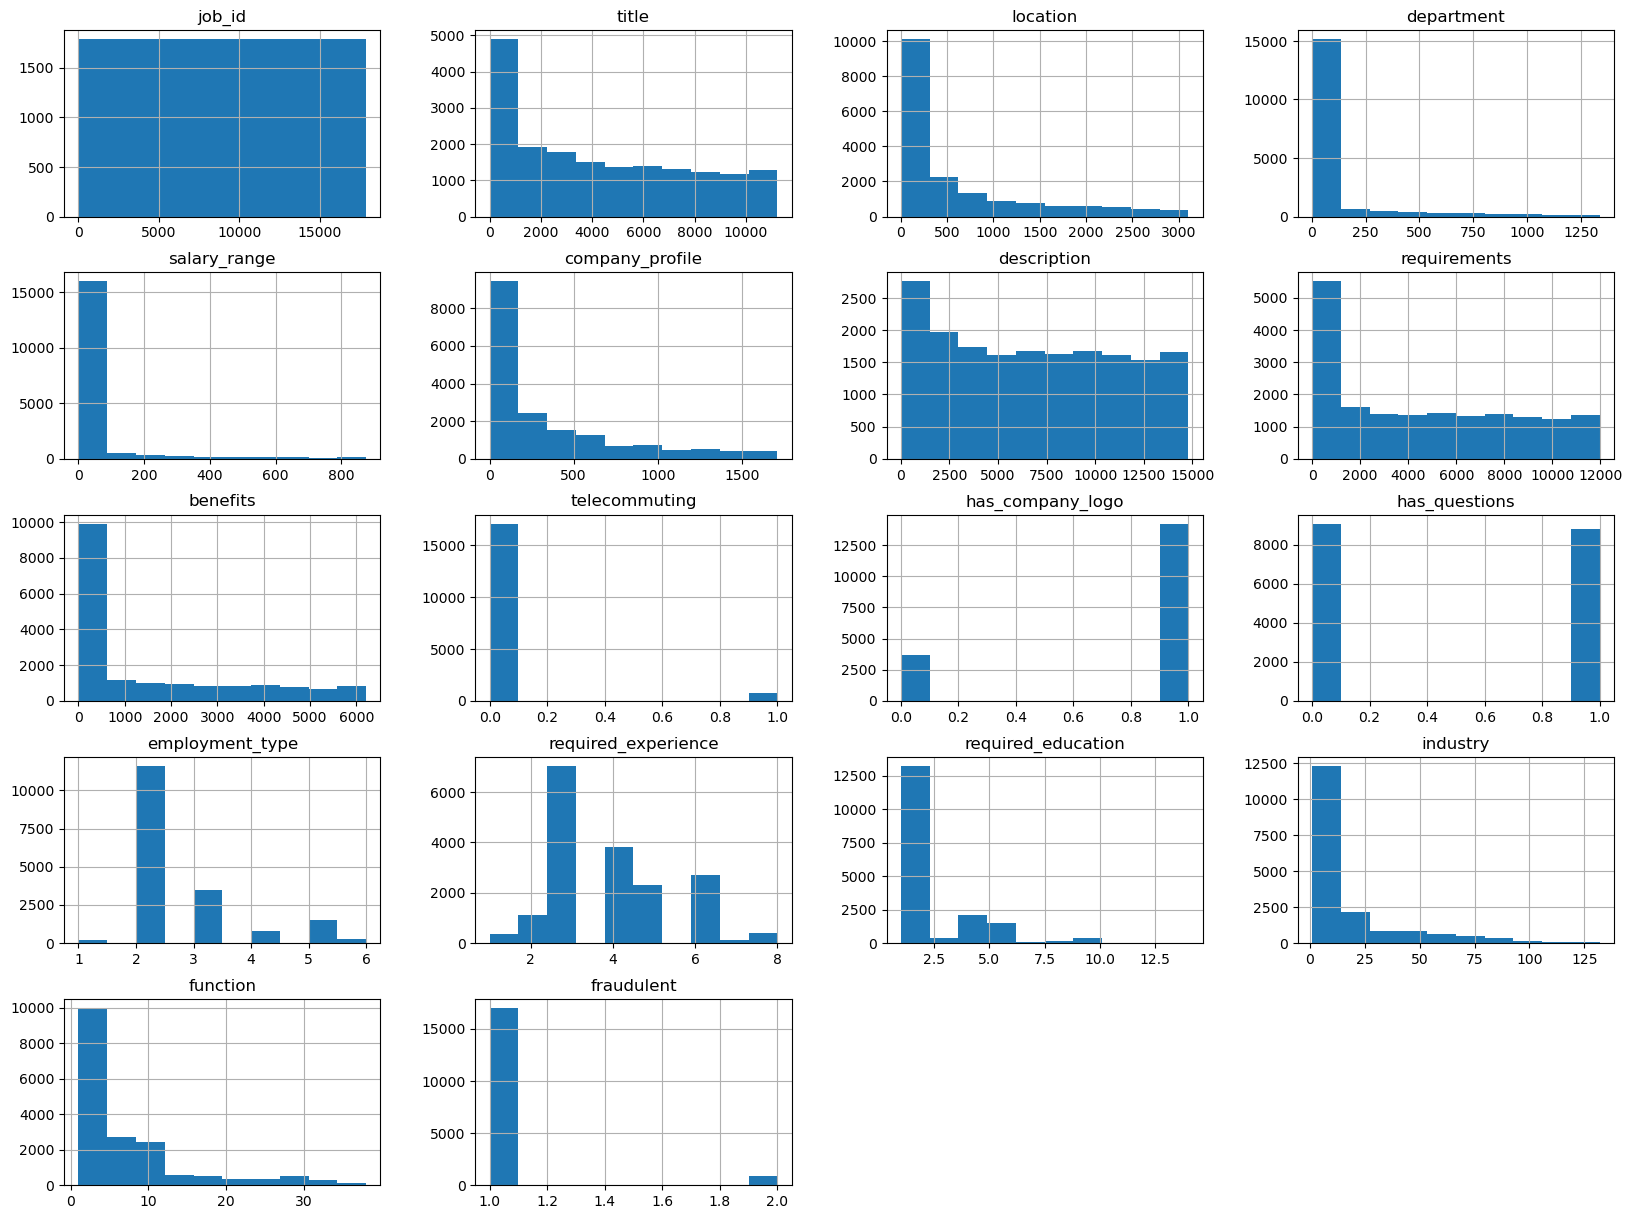

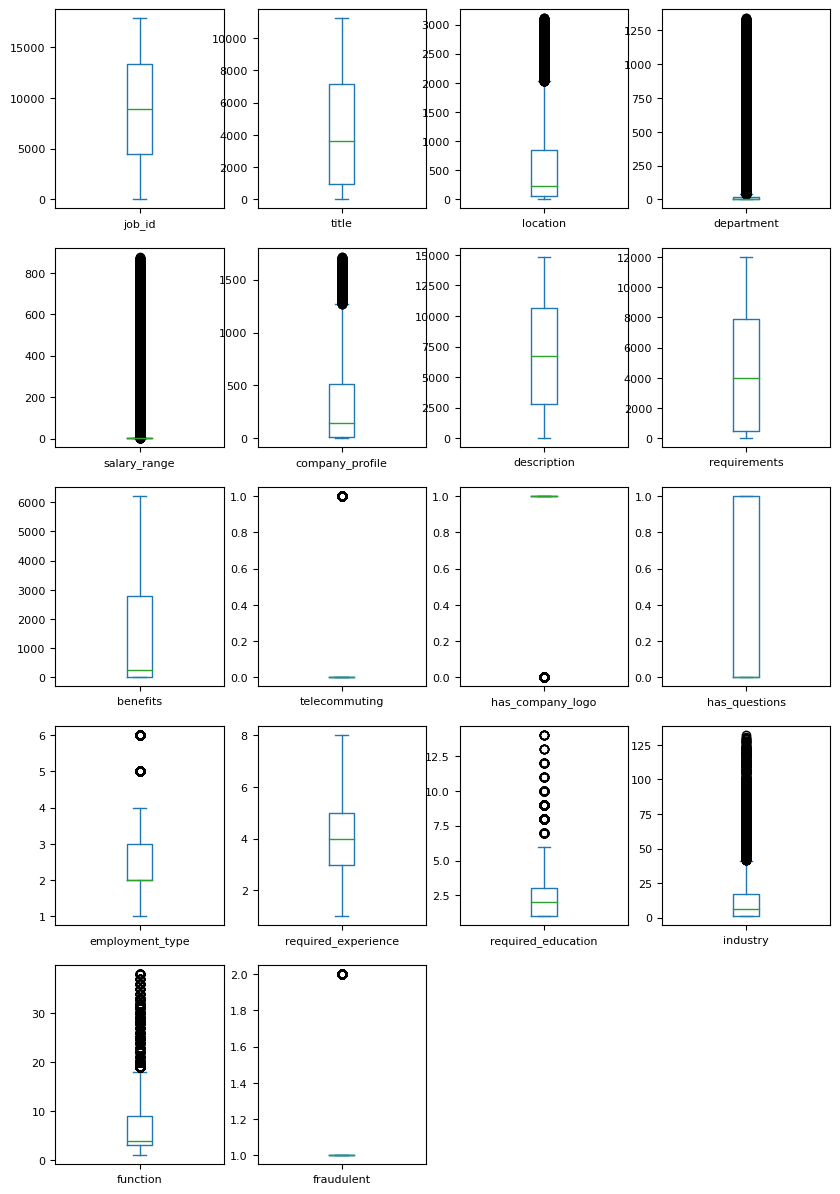

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
job_id
False    17880
Name: job_id, dtype: int64
--------------------------------
title
False    17880
Name: title, dtype: int64
--------------------------------
location
False    17880
Name: location, dtype: int64
--------------------------------
department
False    17880
Name: department, dtype: int64
--------------------------------
salary_range
False    17880
Name: salary_range, dtype: int64
--------------------------------
company_profile
False    17880
Name: company_profile, dtype: int64
--------------------------------
descr

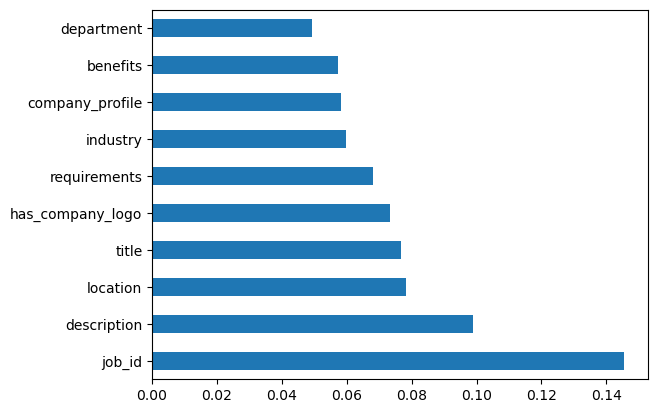

Classifier accuracy being obtained with single thread
Here
Working on LinR...
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')
Estimated Accuracy of Linear Regression:  0.08715075432036437
Working on LogR...
Estimate Accuracy Logistic regression:  0.951565995525727
Working on KNN...
Estimated accuracy KNN: 0.959228187919463
Working on GNB...
Estimate accuracy GNB:  0.9175055928411634
Working on Per...
Estimate accuracy Perceptron:  0.9434563758389262
Working on LinSVC...
Estimate accuracy Linear SVC:  0.8507270693512303
Working on SGD...
Estimate accuracy Stochastic Gradient Descent:  0.9057606263982102
Working on DT...
Estimate accuracy Decision Tree:  0.9753355704697986
Working on RF...
Estimate accur

In [6]:
if __name__ == '__main__':
    main()

In [7]:
        try:
            #Model evaluation
            print("Model evaluation")
            models = pd.DataFrame({
            'Model': ['Linear Regression','Support Vector Machines', 'KNN', 'Logistic Regression',
                    'Random Forest', 'Naive Bayes', 'Perceptron',
                    'Stochastic Gradient Decent', 'Linear SVC',
                    'Decision Tree','Linear Discriminant Analysis','Ada Boost Classifier','Gradient Boosting Classifier','Extra TreesClassifier','XGB Classifier'],

            'Score': [results_linreg.mean(),results_logreg.mean(),results_svc.mean(),
                      results_knn.mean(),results_gaussian.mean(),results_perceptron.mean(),
                      results_linearsvc.mean(),results_sgd.mean(),results_decisiontree.mean(),
                      results_randomforest.mean(),results_clf.mean(),results_AB.mean(),results_GBC.mean(),
                      results_ETC.mean(),results_xgbs.mean()]})

            print(models.sort_values(by='Score', ascending=False))

        except Exception as e:
            print("error Model evaluation, you may be using multiple threads")
            print (str(e))

Model evaluation
error Model evaluation, you may be using multiple threads
name 'results_linreg' is not defined
